In [1]:
using ComputationalHeatTransfer
using LaTeXStrings
using Revise
using LinearAlgebra
# using DifferentialEquations
using Interpolations
using JLD2
using Plots
gr()  

cd(dirname(pwd()))
cd("src") 
includet("OneDOHP.jl")
using ..OneDOHP

In [2]:
fluid_type = "butane"
Tᵥ = 291.2

291.2

In [3]:
Cpₗ = CoolProp.PropsSI("CPMASS","T",Tᵥ,"Q",0.0,fluid_type)
ρₗ  = CoolProp.PropsSI("D","T",Tᵥ,"Q",0.0,fluid_type)
μₗ  = CoolProp.PropsSI("V","T",Tᵥ,"Q",0.0,fluid_type)
hₗ = CoolProp.PropsSI("H","T",Tᵥ,"Q",0.0,fluid_type)
kₗ = CoolProp.PropsSI("CONDUCTIVITY","T",Tᵥ,"Q",0.0,fluid_type)
Prₗ = CoolProp.PropsSI("PRANDTL","T",Tᵥ,"Q",0.0,fluid_type)

Cpᵥ = CoolProp.PropsSI("CPMASS","T",Tᵥ,"Q",1.0,fluid_type)
ρᵥ  = CoolProp.PropsSI("D","T",Tᵥ,"Q",1.0,fluid_type)
μᵥ  = CoolProp.PropsSI("V","T",Tᵥ,"Q",1.0,fluid_type);
hᵥ = CoolProp.PropsSI("H","T",Tᵥ,"Q",1.0,fluid_type)
kᵥ = CoolProp.PropsSI("CONDUCTIVITY","T",Tᵥ,"Q",1.0,fluid_type)
Prᵥ = CoolProp.PropsSI("PRANDTL","T",Tᵥ,"Q",1.0,fluid_type)

σ = CoolProp.PropsSI("I","T",Tᵥ,"Q",0.0,fluid_type)
P = CoolProp.PropsSI("P","T",Tᵥ,"Q",0.0,fluid_type)
R = CoolProp.PropsSI("GAS_CONSTANT","T",Tᵥ,"Q",1.0,fluid_type)
M = CoolProp.PropsSI("M","T",Tᵥ,"Q",1.0,fluid_type)
Rkg = R/M

αₗ = kₗ/ρₗ/Cpₗ
νₗ = μₗ/ρₗ
νᵥ = μᵥ/ρᵥ;
hₗᵥ = hᵥ-hₗ;

In [4]:
plate_hist, integrator_plate = load("plate_OHP2_30W2.jld2", "plate_hist",  "integrator_plate")
sys = integrator_plate.p

Unbounded Heat conduction system on a grid of size 250 x 108 and 0 static immersed points


In [5]:
tube_hist, integrator_tube = load("tube_OHP2_30W2.jld2", "tube_hist",  "integrator_tube")

sysfinal = []
for i = 1:length(tube_hist)
    push!(sysfinal, deepcopy(getcurrentsys(tube_hist[i].u,tube_hist[i].p)))
end

## Get RTD result for OHP1

In [6]:
import XLSX

In [7]:
# xf = XLSX.readxlsx("20190613_F_PD_#004_O001_H001_P040_expA.xlsx")
xf = XLSX.readxlsx("20190612_F_PD_#007_O002_H001_P030_expA.xlsx")
starti = 3603
# RTD = xf["Raw Data!G:N"][starti:end,:];
RTD = xf["Raw Data!U:AB"][starti:end,:];
RTDt = (1:size(RTD,1)) .+ starti;

## Contour graphs

### plate T [K]

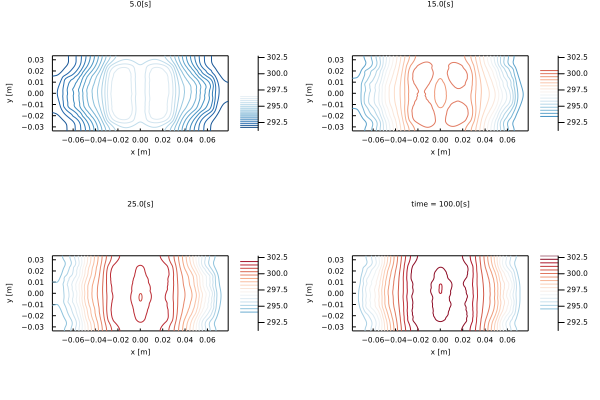

In [8]:
Tmax = maximum(temperature(plate_hist[end])[:])
Tmin = minimum(temperature(plate_hist[1])[:])

l = @layout [a b ; c d]
p1 = plot(temperature(plate_hist[5]),sys.grid,legend=true,color=cgrad(:RdBu,rev=true),clim=(Tmin,Tmax),xlabelfontsize =5,ylabelfontsize =5,xtickfontsize=5,ytickfontsize=5,titlefontsize =5,line_z=0,xlabel="x [m]",ylabel="y [m]",title=string(round(plate_hist[5].t, digits=2), "[s]"))
p2 = plot(temperature(plate_hist[15]),sys.grid,legend=true,color=cgrad(:RdBu,rev=true),clim=(Tmin,Tmax),xlabelfontsize =5,ylabelfontsize =5,xtickfontsize=5,ytickfontsize=5,titlefontsize =5,line_z=0,xlabel="x [m]",ylabel="y [m]",title=string(round(plate_hist[15].t, digits=2), "[s]"))
p3 = plot(temperature(plate_hist[25]),sys.grid,legend=true,color=cgrad(:RdBu,rev=true),clim=(Tmin,Tmax),xlabelfontsize =5,ylabelfontsize =5,xtickfontsize=5,ytickfontsize=5,titlefontsize =5,line_z=0,xlabel="x [m]",ylabel="y [m]",title=string(round(plate_hist[25].t, digits=2), "[s]"))
p4 = plot(temperature(plate_hist[100]),sys.grid,legend=true,color=cgrad(:RdBu,rev=true),clim=(Tmin,Tmax),xlabelfontsize =5,ylabelfontsize =5,xtickfontsize=5,ytickfontsize=5,titlefontsize =5,line_z=0,xlabel="x [m]",ylabel="y [m]",title=string("time = ", round(plate_hist[100].t, digits=2), "[s]"))
plot(p1, p2, p3, p4, layout = l)

In [9]:
savefig("temperature_contour.svg")

In [6]:

@gif for i = 1:1:length(plate_hist)
plot(temperature(plate_hist[i]),sys.grid,legend=true,color=cgrad(:RdBu,rev=true),clim=(Tmin,Tmax),line_z=0,xlabel="x [m]",ylabel="y [m]",title=string("time = ", round(plate_hist[i].t, digits=2), "[s] \n",  "T[K]"))
scatter!([x[1],x[4]],[y[1],y[4]])
annotate!(x[1]+0.002, y[1]+0.005, "RTD1", :color)
annotate!(x[4]+0.002, y[4]+0.005, "RTD4", :color,legend=false)
end



LoadError: UndefVarError: Tmax not defined

In [11]:
i = length(plate_hist)
plot(temperature(plate_hist[i]),sys.grid,legend=true,color=cgrad(:RdBu,rev=true),clim=(Tmin,Tmax),line_z=0,xlabel="x [m]",ylabel="y [m]",title=string("time = ", round(plate_hist[i].t, digits=2), "[s] \n",  "T[K]"))
scatter!([x[1],x[4]],[y[1],y[4]])
annotate!(x[1]+0.002, y[1]+0.005, "RTD1", :color)
annotate!(x[4]+0.002, y[4]+0.005, "RTD4", :color,legend=false)

LoadError: UndefVarError: x not defined

In [12]:
savefig("temperature_contour_withRTD.svg")

In [13]:
# @gif for ii=1:1:length(sysfinal)
# #     plot(sysfinal[ii],plottype="T",ylim=(Tmin,Tmax),xlabel="ξ [m]",ylabel="T [K]",xlim=(0.0,0.5))
#     plot(sysfinal[ii],plottype="T",ylim=(291.0,293.0),xlabel="ξ [m]",ylabel="T [K]",xlim=(0.0,0.1))
# end
# # savefig("tubetemp.svg")

In [14]:
# @gif for ii=1:length(sysfinal)
#     plot(sysfinal[ii],plottype="ΔT",ylim=(-4.0,1.0))
#     plot!([0.0,sysfinal[ii].tube.L],[sysfinal[1].wall.ΔTthres,sysfinal[1].wall.ΔTthres],label="boiling threshold")
# end

### liquid slugs

In [15]:
# l = @layout [a b ; c d]
# Htmp = sys_to_Harray(sysfinal[5])
# p1   = plot(sys.qline[1].body,fillalpha=0,titlefontsize=10,linecolor=cgrad([:gold, :blue],rev=true),line_z=Htmp,title=string(round(plate_hist[5].t, digits=2), "[s]"),xlabel="x ",ylabel="y ",border=:none,axis=nothing)
# Htmp = sys_to_Harray(sysfinal[15])
# p2   = plot(sys.qline[1].body,fillalpha=0,titlefontsize=10,linecolor=cgrad([:gold, :blue],rev=true),line_z=Htmp,title=string(round(plate_hist[15].t, digits=2), "[s]"),xlabel="x ",ylabel="y ",border=:none,axis=nothing)
# Htmp = sys_to_Harray(sysfinal[25])
# p3   = plot(sys.qline[1].body,fillalpha=0,titlefontsize=10,linecolor=cgrad([:gold, :blue],rev=true),line_z=Htmp,title=string(round(plate_hist[25].t, digits=2), "[s]"),xlabel="x ",ylabel="y ",border=:none,axis=nothing)
# Htmp = sys_to_Harray(sysfinal[100])
# p4   = plot(sys.qline[1].body,fillalpha=0,titlefontsize=10,linecolor=cgrad([:gold, :blue],rev=true),line_z=Htmp,title=string(round(plate_hist[100].t, digits=2), "[s]"),xlabel="x ",ylabel="y ",border=:none,axis=nothing)
# plot(p1, p2, p3, p4, layout = l)

In [99]:
savefig("ohp.svg")

┌ Info: Saved animation to 
│   fn = C:\Users\liyux\Documents\GitHub\ComputationalHeatTransfer.jl\src\tmp.gif
└ @ Plots C:\Users\liyux\.julia\packages\Plots\AJMX6\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\liyux\\Documents\\GitHub\\ComputationalHeatTransfer.jl\\src\\tmp.gif")
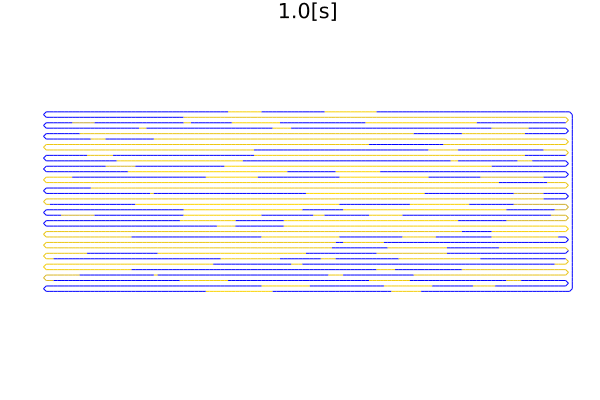

In [16]:
@gif for i=1:1:length(sysfinal)
    Htmp = sys_to_Harray(sysfinal[i])
    plot(sys.qline[1].body,fillalpha=0,linecolor=cgrad([:gold, :blue],rev=true),line_z=Htmp,title=string(round(plate_hist[i].t, digits=2), "[s]"),xlabel="x ",ylabel="y ",border=:none,axis=nothing,label="asd")
end

In [17]:
savefig("OHPslugs.svg")

In [18]:
# @gif for ii=1:length(sysfinal)
#     plot(sysfinal[ii],plottype="P")
# end

In [19]:
# plot(sys.qline[1].arccoord,sys_to_heatflux(sysfinal[end]))

## get and save tempeature line graph

In [8]:
inch = 2.54e-2;

x = [-2.75inch,-1.4inch,-0.8inch,0.0,0.0,0.8inch,1.4inch,2.75inch]
y = [0.0,0.0,0.0,0.0,0.4inch,0.0,0.0,0.0]

X =  VectorData(x,y);

In [9]:
H = Regularize(X,cellsize(sys),I0=origin(sys.grid))
g = ScalarData(X);

In [10]:
ghist = []

size(g)
for j = 1:length(g)
    gtemp = []
    for i = 1:length(plate_hist)
        H(g,temperature(plate_hist[i]))
        append!(gtemp,deepcopy(g[j]))
    end
    push!(ghist,deepcopy(gtemp))
end

thist = []
    for i = 1:length(plate_hist)
        append!(thist,plate_hist[i].t)
    end

In [11]:
# save("DT1.0_H3000_Film3.0_F1_Nu436_plated_2.jld","thist",thist,"ghist",ghist)

## Plot temperature curves

In [39]:
thist_DT1_H3000_Film3_F1_Nu436_plated_2,ghist_DT1_H3000_Film3_F1_Nu436_plated_2 = load("DT1.0_H3000_Film3.0_F1_Nu436_plated_2.jld","thist","ghist");

In [40]:
thist_conserve_DT1_H3000_Film3_F1_Nu436_plated_2,ghist_conserve_DT1_H3000_Film3_F1_Nu436_plated_2 = load("conserve_DT1.0_H3000_Film3.0_F1_Nu436_plated_2.jld","thist","ghist");

In [41]:
thist_conserve_DT2_H4000_Film3_F1_Nu436_plated_15,ghist_conserve_DT2_H4000_Film3_F1_Nu436_plated_15 = load("conserve_DT2.0_H4000_Film3.0_F1_plated_15.jld","thist","ghist");

In [42]:
thist_Conserve_H2250_D1_TH1,ghist_Conserve_H2250_D1_TH1 = load("conserve_DT1.0_H2250_Film1.0.jld","thist","ghist");

In [43]:
thist_Conserve_H2250_D1_TH1_F2,ghist_Conserve_H2250_D1_TH1_F2 = load("Conserve_H2250_D1_TH1_F2.jld","thist","ghist");

In [44]:
thist_Conserve_H2250_D2_TH10_F1,ghist_Conserve_H2250_D2_TH10_F1 = load("Conserve_H2250_D2_TH10_F1.jld","thist","ghist");

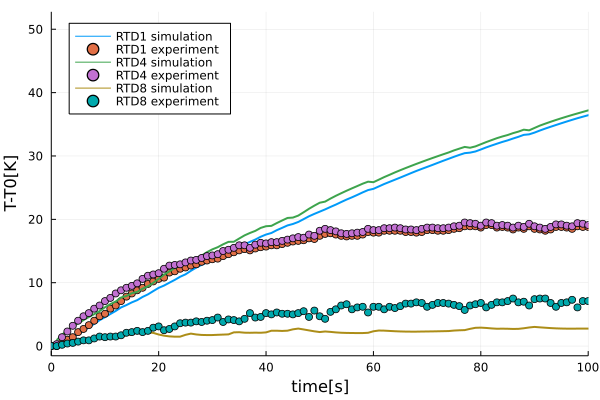

In [12]:
i = 1 #RTD number

plot(thist,ghist[i] .-Tᵥ,label=string("RTD", i," simulation"),linewidth=2)
# plot(thist_conserve_DT1_H3000_Film3_F1_Nu436_plated_2,ghist_conserve_DT1_H3000_Film3_F1_Nu436_plated_2[i] .-Tᵥ,label=string("RTD", i," flim δ=30 μm, ΔT=1.0 [K], Hc = 3000 [W/K], plate d = 2 [mm]"),linewidth=2)
# plot!(thist_conserve_DT2_H4000_Film3_F1_Nu436_plated_15,ghist_conserve_DT2_H4000_Film3_F1_Nu436_plated_15[i] .-Tᵥ,label=string("RTD", i," flim δ=30 μm, ΔT=2.0 [K], Hc = 4000 [W/K], plate d = 1.5 [mm]"),linewidth=2)
# plot!(thist_Conserve_H2250_D1_TH1,ghist_Conserve_H2250_D1_TH1[i] .-Tᵥ,label=string("RTD", i," flim δ=10 μm, ΔT=1.0 [K], Hc = 2250 [W/K], plate d = 1.5 [mm]"),linewidth=2)
scatter!(RTDt .- RTDt[1],RTD[:,i] .- RTD[1,i], label=string("RTD", i," experiment"),xlim=(0.0,50.0))

i = 4 #RTD number

plot!(thist,ghist[i] .-Tᵥ,label=string("RTD", i," simulation"),linewidth=2)
# plot(thist_conserve_DT1_H3000_Film3_F1_Nu436_plated_2,ghist_conserve_DT1_H3000_Film3_F1_Nu436_plated_2[i] .-Tᵥ,label=string("RTD", i," flim δ=30 μm, ΔT=1.0 [K], Hc = 3000 [W/K], plate d = 2 [mm]"),linewidth=2)
# plot!(thist_conserve_DT2_H4000_Film3_F1_Nu436_plated_15,ghist_conserve_DT2_H4000_Film3_F1_Nu436_plated_15[i] .-Tᵥ,label=string("RTD", i," flim δ=30 μm, ΔT=2.0 [K], Hc = 4000 [W/K], plate d = 1.5 [mm]"),linewidth=2)
# plot!(thist_Conserve_H2250_D1_TH1,ghist_Conserve_H2250_D1_TH1[i] .-Tᵥ,label=string("RTD", i," flim δ=10 μm, ΔT=1.0 [K], Hc = 2250 [W/K], plate d = 1.5 [mm]"),linewidth=2)
scatter!(RTDt .- RTDt[1],RTD[:,i] .- RTD[1,i], label=string("RTD", i," experiment"),xlim=(0.0,50.0))

i = 8 #RTD number
plot!(thist,ghist[i] .-Tᵥ,label=string("RTD", i," simulation"),linewidth=2)
# plot!(thist_conserve_DT1_H3000_Film3_F1_Nu436_plated_2,ghist_conserve_DT1_H3000_Film3_F1_Nu436_plated_2[i] .-Tᵥ,label=string("RTD", i," flim δ=30 μm, ΔT=1.0 [K], Hc = 3000 [W/K], plate d = 2 [mm]"),linewidth=2)
# plot!(thist_conserve_DT2_H4000_Film3_F1_Nu436_plated_15,ghist_conserve_DT2_H4000_Film3_F1_Nu436_plated_15[i] .-Tᵥ,label=string("RTD", i," flim δ=30 μm, ΔT=2.0 [K], Hc = 4000 [W/K], plate d = 1.5 [mm]"),linewidth=2)
# plot!(thist_Conserve_H2250_D1_TH1,ghist_Conserve_H2250_D1_TH1[i] .-Tᵥ,label=string("RTD", i," flim δ=10 μm, ΔT=1.0 [K], Hc = 2250 [W/K], plate d = 1.5 [mm]"),linewidth=2)
scatter!(RTDt .- RTDt[1],RTD[:,i] .- RTD[1,i],legend=:topleft, label=string("RTD", i," experiment"),xlim=(0.0,100.0),xlabel="time[s]",ylabel="T-T0[K]")

In [46]:
savefig("Tempcurves.svg")

## ~heat ressistance curves

In [47]:
power = 30

30

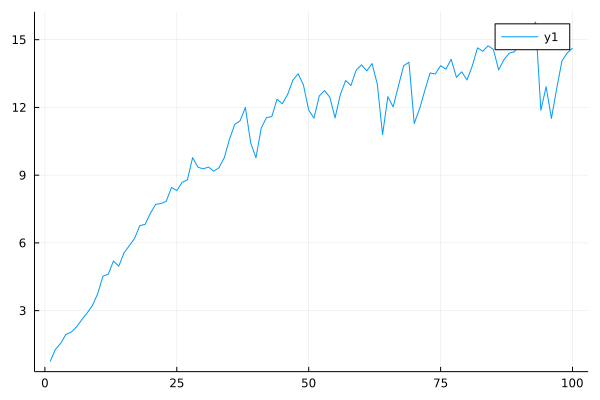

In [52]:
plot(ghist[4] .-ghist[1])

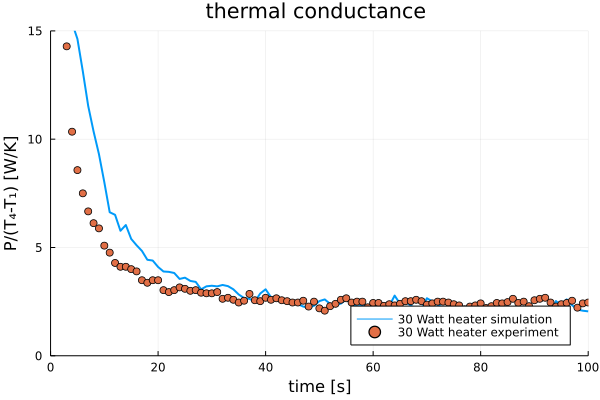

In [53]:
i1 = 4 #RTD number
i2 = 8 #RTD number
plot(thist, power ./ (ghist[i1] .-ghist[1]),label=string("30 Watt heater simulation"),linewidth=2,ylim=(0,15))
# plot(thist_DT1_H3000_Film3_F1_Nu436_plated_2, power ./ (ghist_conserve_DT1_H3000_Film3_F1_Nu436_plated_2[i1] .-ghist_conserve_DT1_H3000_Film3_F1_Nu436_plated_2[i2]),label=string("40 Watt heater simulation"),linewidth=2,ylim=(0,15))
# plot(thist_conserve_DT1_H3000_Film3_F1_Nu436_plated_2,ghist_conserve_DT1_H3000_Film3_F1_Nu436_plated_2[i1] .-ghist_conserve_DT1_H3000_Film3_F1_Nu436_plated_2[i2],label=string("RTD", i," flim δ=30 μm, ΔT=1.0 [K], Hc = 3000 [W/K], plate d = 2 [mm]"),linewidth=2)
# plot!(thist_conserve_DT2_H4000_Film3_F1_Nu436_plated_15,ghist_conserve_DT2_H4000_Film3_F1_Nu436_plated_15[i] .-Tᵥ,label=string("RTD", i," flim δ=30 μm, ΔT=2.0 [K], Hc = 4000 [W/K], plate d = 1.5 [mm]"),linewidth=2)
# plot!(thist_Conserve_H2250_D1_TH1,ghist_Conserve_H2250_D1_TH1[i1] .-ghist_Conserve_H2250_D1_TH1[i2],label=string("RTD", i," flim δ=10 μm, ΔT=1.0 [K], Hc = 2250 [W/K], plate d = 1.5 [mm]"),linewidth=2)
scatter!(RTDt .- RTDt[1],power ./(RTD[:,i1] .- RTD[:,i2]), label=string("30 Watt heater experiment"),legend=:bottomright,xlim=(0.0,100.0),title="thermal conductance ",xlabel="time [s]",ylabel="P/(T₄-T₁) [W/K]")

In [35]:
savefig("thermal_conductance.svg")

## film δ distribution

In [36]:
addindex = 50:1:100
δArray = []
for i in addindex
δArray = [δArray;sysfinal[i].vapor.δ]
end

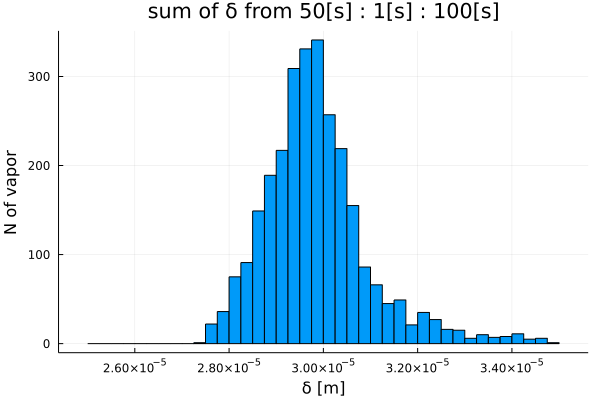

In [37]:
histogram(δArray,bins=2.5e-5:0.25e-6:3.5e-5,title="sum of δ from 50[s] : 1[s] : 100[s]",legend=false,xlabel="δ [m]",ylabel="N of vapor") 

In [38]:
savefig("sum_film_thickness.svg")

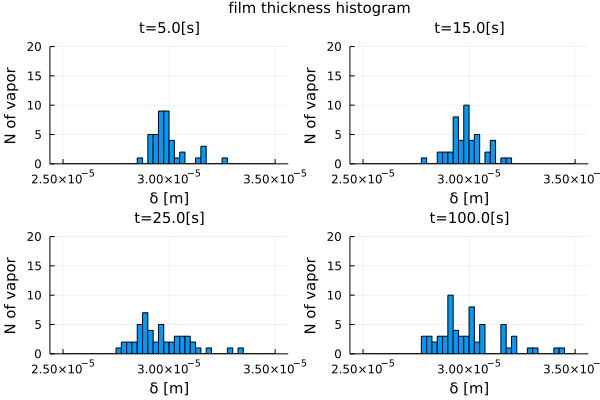

In [39]:
l = @layout [a b ; c d]
pltindex=[5,15,25,100]
p1 = histogram(sysfinal[pltindex[1]].vapor.δ,bins=2.5e-5:0.25e-6:3.5e-5,ylim=(0,20),title=string("t=",round(plate_hist[pltindex[1]].t, digits=2), "[s]")) 
p2 = histogram(sysfinal[pltindex[2]].vapor.δ,bins=2.5e-5:0.25e-6:3.5e-5,ylim=(0,20),title=string("t=",round(plate_hist[pltindex[2]].t, digits=2), "[s]")) 
p3 = histogram(sysfinal[pltindex[3]].vapor.δ,bins=2.5e-5:0.25e-6:3.5e-5,ylim=(0,20),title=string("t=",round(plate_hist[pltindex[3]].t, digits=2), "[s]")) 
p4 = histogram(sysfinal[pltindex[4]].vapor.δ,bins=2.5e-5:0.25e-6:3.5e-5,ylim=(0,20),title=string("t=",round(plate_hist[pltindex[4]].t, digits=2), "[s]")) 
plot(p1, p2, p3, p4, layout = l,titlefontsize=10,labelfontsize=10,xticks=2.5e-5:0.5e-5:3.5e-5,legend=false,xlabel="δ [m]",ylabel="N of vapor",plot_title="film thickness histogram")

In [40]:
savefig("film_histogram.svg")

## dXdt distribution

In [41]:
V = [elem[2] for elem in sysfinal[pltindex[4]].liquid.dXdt]
Vavg = sum(abs.(V))/length(V)

0.2401469947178859

In [42]:
addindex = 50:1:100
VArray = []
for i in addindex
VArray = [VArray;[elem[2] for elem in sysfinal[i].liquid.dXdt]]
end

In [43]:
density  = fitdensity(VArray,step=0.1,norm=1)

LoadError: UndefVarError: fitdensity not defined

In [44]:
plot(density.x,density.d)

LoadError: type #density has no field x

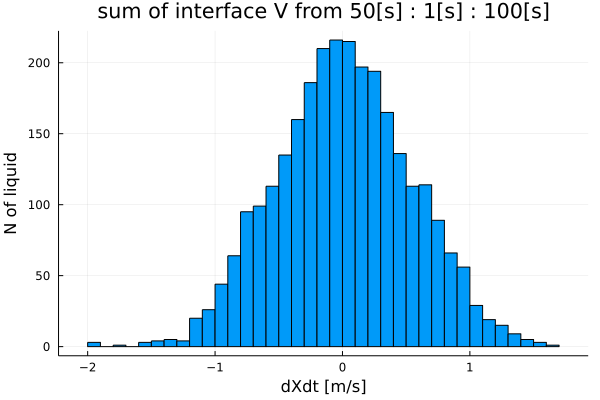

In [45]:
histogram(VArray,title="sum of interface V from 50[s] : 1[s] : 100[s]",legend=false,xlabel="dXdt [m/s]",ylabel="N of liquid") 

In [46]:
savefig("sum_interface_V.svg")

In [17]:
([elem[1] for elem in sysfinal[pltindex[1]].liquid.dXdt]-[elem[2] for elem in sysfinal[pltindex[1]].liquid.dXdt])./[elem[1] for elem in sysfinal[pltindex[1]].liquid.dXdt]

41-element Vector{Float64}:
 -0.0
 -0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  ⋮
 -0.0
 -0.0
 -0.0
  0.0
  0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0
 -0.0

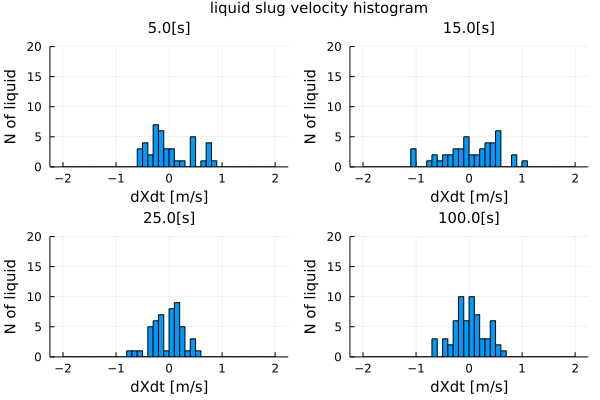

In [20]:
l = @layout [a b ; c d]
pltindex=[5,15,25,100]
p1 = histogram([elem[1] for elem in sysfinal[pltindex[1]].liquid.dXdt],bins=-2:0.1:2,ylim=(0,20),title=string(round(plate_hist[pltindex[1]].t, digits=2), "[s]")) 
p2 = histogram([elem[1] for elem in sysfinal[pltindex[2]].liquid.dXdt],bins=-2:0.1:2,ylim=(0,20),title=string(round(plate_hist[pltindex[2]].t, digits=2), "[s]")) 
p3 = histogram([elem[1] for elem in sysfinal[pltindex[3]].liquid.dXdt],bins=-2:0.1:2,ylim=(0,20),title=string(round(plate_hist[pltindex[3]].t, digits=2), "[s]")) 
p4 = histogram([elem[1] for elem in sysfinal[pltindex[4]].liquid.dXdt],bins=-2:0.1:2,ylim=(0,20),title=string(round(plate_hist[pltindex[4]].t, digits=2), "[s]")) 
plot(p1, p2, p3, p4, layout = l,titlefontsize=10,labelfontsize=10,legend=false,xlabel="dXdt [m/s]",ylabel="N of liquid",plot_title="liquid slug velocity histogram")

In [19]:
savefig("bulkV_histogram.svg")

## correlated film δ

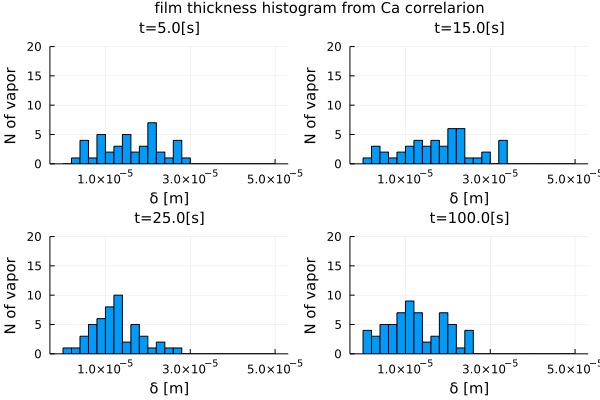

In [49]:
l = @layout [a b ; c d]
pltindex=[5,15,25,100]
p1 = histogram(filmδcorr(getCa(μₗ,σ,[elem[2] for elem in sysfinal[pltindex[1]].liquid.dXdt]),sysfinal[1].tube.d),bins=0e-5:2e-6:5e-5,ylim=(0,20),title=string("t=",round(plate_hist[pltindex[1]].t, digits=2), "[s]")) 
p2 = histogram(filmδcorr(getCa(μₗ,σ,[elem[2] for elem in sysfinal[pltindex[2]].liquid.dXdt]),sysfinal[1].tube.d),bins=0e-5:2e-6:5e-5,ylim=(0,20),title=string("t=",round(plate_hist[pltindex[2]].t, digits=2), "[s]")) 
p3 = histogram(filmδcorr(getCa(μₗ,σ,[elem[2] for elem in sysfinal[pltindex[3]].liquid.dXdt]),sysfinal[1].tube.d),bins=0e-5:2e-6:5e-5,ylim=(0,20),title=string("t=",round(plate_hist[pltindex[3]].t, digits=2), "[s]")) 
p4 = histogram(filmδcorr(getCa(μₗ,σ,[elem[2] for elem in sysfinal[pltindex[4]].liquid.dXdt]),sysfinal[1].tube.d),bins=0e-5:2e-6:5e-5,ylim=(0,20),title=string("t=",round(plate_hist[pltindex[4]].t, digits=2), "[s]")) 
plot(p1, p2, p3, p4, layout = l,titlefontsize=10,labelfontsize=10,xticks=1e-5:2e-5:5e-5,legend=false,xlabel="δ [m]",ylabel="N of vapor",plot_title="film thickness histogram from Ca correlarion")

## OHP animation

In [50]:
ρ = 2700;
c = 8.97e02;
k = 1.67e02;
d = 2e-3;
params = HeatConductionParameters(ρ,c,k,thickness=d)

HeatConductionParameters(2700.0, 897.0, 167.0, 6.895412692514142e-5, 0.002)

In [51]:
Δx = cellsize(sys)
ds = 1.5Δx
nturn = 16
#pitch = 0.125
length_ohp = 44.25*1e-3
height = 133.83*1e-3
gap = d
pitch = length_ohp/(2*nturn+1)
x0, y0 = height/2, length_ohp/2
x, y, xf, yf = ComputationalHeatTransfer.construct_ohp_curve(nturn,pitch,height,gap,ds,x0,y0,false,false,3pi/2)
ohp = BasicBody(x,y)

Basic pointwise-specified body with 4877 points
   Current position: (0.0,0.0)
   Current angle (rad): 0.0


In [52]:
sys.points

0 points of vector-valued Float64 data
Float64[]

┌ Info: Saved animation to 
│   fn = C:\Users\liyux\Documents\GitHub\ComputationalHeatTransfer.jl\src\tmp.gif
└ @ Plots C:\Users\liyux\.julia\packages\Plots\AJMX6\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\liyux\\Documents\\GitHub\\ComputationalHeatTransfer.jl\\src\\tmp.gif")
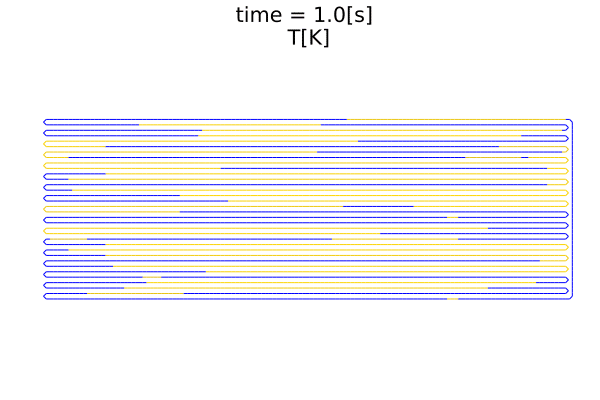

In [143]:
@gif for i=1:1:length(sysfinal)
    Htmp = sys_to_Harray(sysfinal[i])
    plot(ohp,fillalpha=0,linecolor=cgrad([:gold, :blue],rev=true),line_z=Htmp,xlabel="x ",ylabel="y ",border=:none,axis=nothing,title=string("time = ", round(plate_hist[i].t, digits=2), "[s] \n",  "T[K]"))
end

## OHP film thickness correlation

In [54]:
integrator_tube.p.vapor.δ

62-element Vector{Float64}:
 2.9449241404984536e-5
 2.9811886915999305e-5
 2.8857839241555006e-5
 2.7798475174708328e-5
 3.318938245185223e-5
 2.814342251853086e-5
 2.8297933488625713e-5
 2.875996415408346e-5
 2.965399209756393e-5
 3.152939011068593e-5
 3.0136029770806664e-5
 2.957601270308129e-5
 3.1510829513077674e-5
 ⋮
 2.8604005812031455e-5
 3.0493494674403027e-5
 3.054475706416351e-5
 2.960543577240312e-5
 3.065008236008231e-5
 3.0143252090603715e-5
 3.0743169720692395e-5
 3.0032568984141022e-5
 3.0037744566941905e-5
 3.150745349141961e-5
 3.0083138763110685e-5
 2.9183992619519686e-5

In [55]:

velocity_avg = zeros(length(sysfinal))
velocity_max = zeros(length(sysfinal))

for i = 1:length(sysfinal)
    tmp = 0
    for j = length(sysfinal[i].liquid.dXdt)
        tmp += abs(sysfinal[i].liquid.dXdt[j][1])
    
        velocity_avg[i] = tmp/j
    end
    
    velocity_max[i] = maximum(abs.(sysfinal[i].liquid.dXdt[:][1]))
end



In [56]:
μₗ

0.00016930527602594333

In [57]:
Ca = velocity_max .* μₗ ./σ

100-element Vector{Float64}:
 0.0006562318376839708
 0.00031328060011617966
 0.0032124808348493222
 0.0024512996469716734
 0.0037434162922726677
 0.003978640005405035
 0.0006867874733889968
 0.005380216874891514
 0.009210255037471929
 0.0008940973861164454
 0.0017105311508932085
 0.003836615494272464
 0.01234092396392865
 ⋮
 0.002376224065879304
 0.0017923502146402733
 0.0019140023799403666
 0.00583970710466397
 0.0026665694422297803
 0.014653309260352231
 0.003965928815287837
 0.012359732381446224
 0.011502054293379667
 0.010299522448640483
 0.0013034296656270435
 0.009127247550264969

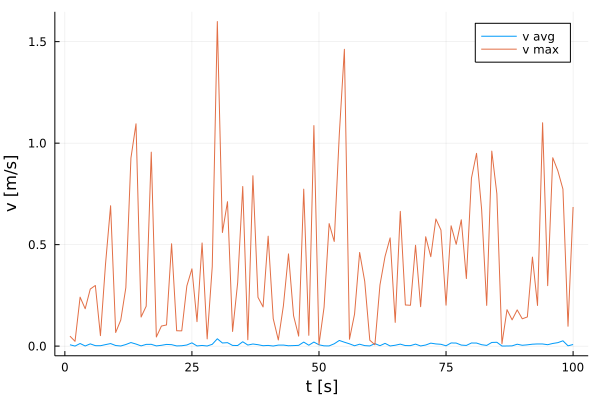

In [58]:
plot(thist,velocity_avg,label="v avg")
plot!(thist,velocity_max,label="v max",xlabel="t [s]", ylabel="v [m/s]")

In [59]:
d_tube = sysfinal[end].tube.d

0.001

### Range of Re
### $Re = \frac{\rho_{\mathrm{l}} v d}{\mu_{\mathrm{l}}}$



In [60]:
Re_avg = d_tube*ρₗ .* velocity_avg / μₗ
Re_max = d_tube*ρₗ .* velocity_max / μₗ;

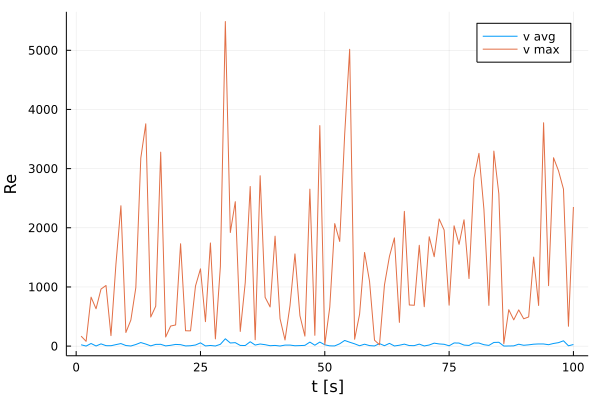

In [61]:
plot(thist,Re_avg,label="v avg")
plot!(thist,Re_max,label="v max",xlabel="t [s]", ylabel="Re")

In [62]:
integrator_tube.p.vapor.δ

62-element Vector{Float64}:
 2.9449241404984536e-5
 2.9811886915999305e-5
 2.8857839241555006e-5
 2.7798475174708328e-5
 3.318938245185223e-5
 2.814342251853086e-5
 2.8297933488625713e-5
 2.875996415408346e-5
 2.965399209756393e-5
 3.152939011068593e-5
 3.0136029770806664e-5
 2.957601270308129e-5
 3.1510829513077674e-5
 ⋮
 2.8604005812031455e-5
 3.0493494674403027e-5
 3.054475706416351e-5
 2.960543577240312e-5
 3.065008236008231e-5
 3.0143252090603715e-5
 3.0743169720692395e-5
 3.0032568984141022e-5
 3.0037744566941905e-5
 3.150745349141961e-5
 3.0083138763110685e-5
 2.9183992619519686e-5

In [63]:
δ_corr = integrator_tube.p.tube.d * (0.67 .* Ca.^(2/3)) ./ ( 1 .+ 3.35 .* Ca.^(2/3))

100-element Vector{Float64}:
 4.93472515157606e-6
 3.0434826574402986e-6
 1.3595491604029658e-5
 1.1481444035679198e-5
 1.4945906282379018e-5
 1.551754367143178e-5
 5.082878247354186e-6
 1.8653247188081513e-5
 2.5661697998464702e-5
 6.030699517936553e-6
 9.14470457175702e-6
 1.5174214489446875e-5
 3.035030192378239e-5
 ⋮
 1.125906930982112e-5
 9.420409421350853e-6
 9.82128609225707e-6
 1.9598072393237036e-5
 1.210405303388197e-5
 3.341690415212134e-5
 1.5487035814898857e-5
 3.0376448946077825e-5
 2.9161746984891078e-5
 2.737531354748216e-5
 7.687368248534865e-6
 2.552699028044807e-5

In [64]:
δ_corr = integrator_tube.p.tube.d * (0.67 .* Ca2.^(2/3)) ./ ( 1 .+ 3.35 .* Ca2.^(2/3))

LoadError: UndefVarError: Ca2 not defined

In [65]:
U = 0.4 #m/s

Ca2 = U .* μₗ ./σ

0.005326442785084719

In [66]:
tube_d = 1e-3

0.001

In [67]:
Ca_star1 = (μₗ^2/(σ * ρₗ * tube_d/2))^(3/4)

0.00014707293668338002

In [68]:
Ca_star2 = (μₗ^2/(σ * ρₗ * tube_d/2))^(1/2)

0.0027862613002621896

In [69]:
sysfinal[1].wall.ΔTthres

1.0

In [70]:
sysfinal[1].vapor.δ

26-element Vector{Float64}:
 2.9097387555040732e-5
 2.942954085465866e-5
 3.0547229371909545e-5
 3.0237400145199234e-5
 2.9392167054561593e-5
 3.061471214014317e-5
 3.288224843609419e-5
 2.918850668572596e-5
 3.0278733318850102e-5
 2.932338413914996e-5
 3.247387320024921e-5
 2.8972905259452536e-5
 3.016969087235499e-5
 3.1234183611936886e-5
 3.114952414244878e-5
 3.0941624226268576e-5
 2.9601830655336934e-5
 2.9801405263958563e-5
 2.8820940291501015e-5
 2.966273288647261e-5
 3.139155921710976e-5
 3.0255358046520195e-5
 3.2314734115044866e-5
 2.977350507767058e-5
 2.9302586603128226e-5
 3.012794870365631e-5

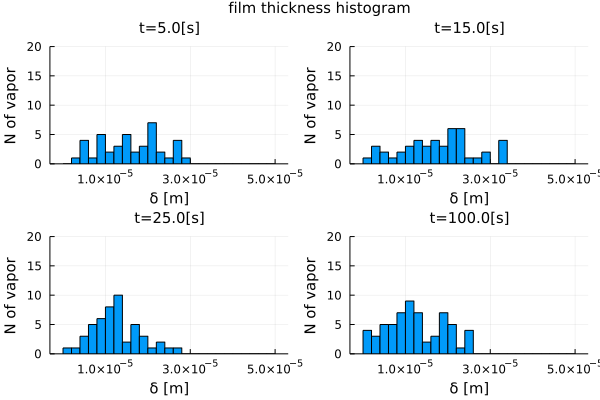

In [71]:
l = @layout [a b ; c d]
pltindex=[5,15,25,100]
p1 = histogram(filmδcorr(getCa(μₗ,σ,[elem[2] for elem in sysfinal[pltindex[1]].liquid.dXdt]),sysfinal[1].tube.d),bins=0e-5:2e-6:5e-5,ylim=(0,20),title=string("t=",round(plate_hist[pltindex[1]].t, digits=2), "[s]")) 
p2 = histogram(filmδcorr(getCa(μₗ,σ,[elem[2] for elem in sysfinal[pltindex[2]].liquid.dXdt]),sysfinal[1].tube.d),bins=0e-5:2e-6:5e-5,ylim=(0,20),title=string("t=",round(plate_hist[pltindex[2]].t, digits=2), "[s]")) 
p3 = histogram(filmδcorr(getCa(μₗ,σ,[elem[2] for elem in sysfinal[pltindex[3]].liquid.dXdt]),sysfinal[1].tube.d),bins=0e-5:2e-6:5e-5,ylim=(0,20),title=string("t=",round(plate_hist[pltindex[3]].t, digits=2), "[s]")) 
p4 = histogram(filmδcorr(getCa(μₗ,σ,[elem[2] for elem in sysfinal[pltindex[4]].liquid.dXdt]),sysfinal[1].tube.d),bins=0e-5:2e-6:5e-5,ylim=(0,20),title=string("t=",round(plate_hist[pltindex[4]].t, digits=2), "[s]")) 
plot(p1, p2, p3, p4, layout = l,titlefontsize=10,labelfontsize=10,xticks=1e-5:2e-5:5e-5,legend=false,xlabel="δ [m]",ylabel="N of vapor",plot_title="film thickness histogram")

In [72]:
i = 100
velocity = 
Ca = 

plot(δfilm)

LoadError: UndefVarError: δfilm not defined

In [73]:
velocity = [elem[1] for i =1:]getCa(μ,σ,velocity)

LoadError: syntax: missing last argument in "1:" range expression 

In [74]:
ρₗ-ρᵥ

575.8061877340982

In [73]:
bo = (ρₗ-ρᵥ).*9.8*(1e-3)^2/σ

0.44382236787434604

In [72]:
μₗ.*1.0/σ

0.013316106962711799

In [74]:
function getCa(μ,σ,velocity)
    Ca = abs.(μ.*velocity./σ)
end

function filmδcorr(Ca,d)
    filmδ = d .* 0.67.*Ca.^(2/3)./(1 .+ 3.35.*Ca.^(2/3))
end

filmδcorr (generic function with 1 method)

## Film thickness graphs

┌ Info: Saved animation to 
│   fn = C:\Users\liyux\Documents\GitHub\ComputationalHeatTransfer.jl\src\tmp.gif
└ @ Plots C:\Users\liyux\.julia\packages\Plots\AJMX6\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\liyux\\Documents\\GitHub\\ComputationalHeatTransfer.jl\\src\\tmp.gif")
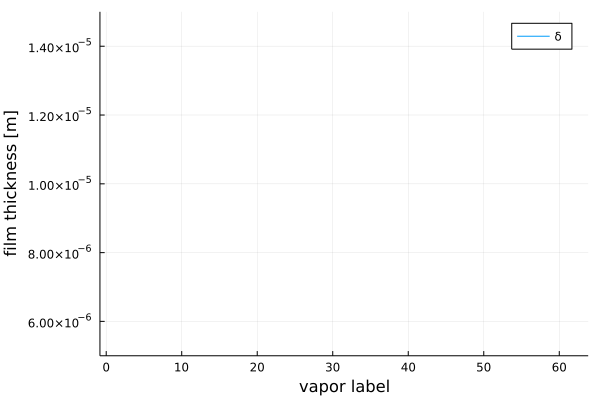

In [75]:
@gif for i=length(sysfinal):length(sysfinal)
    plot(sysfinal[i].vapor.δ,xlabel="vapor label",ylabel="film thickness [m]", label = "δ",ylim=(5e-6,1.5e-5))
end

## boiling graph

In [21]:
boil_data = load("boil_data_OHP1_40W.jld2","boil_data");

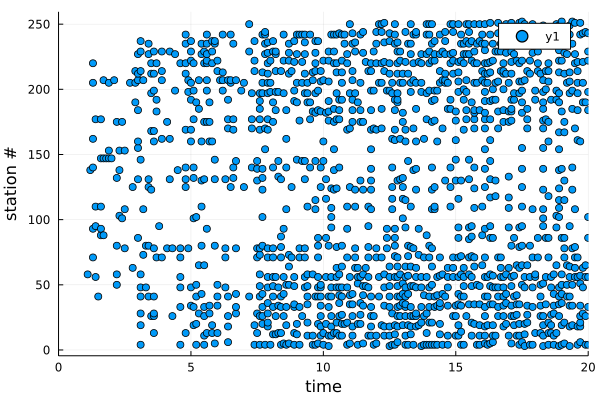

In [22]:
scatter(boil_data[:,2],boil_data[:,1],xlabel="time",ylabel="station #",xlim=(0.0,20.0))

In [23]:
Xstations = sysfinal[end].wall.Xstations;

In [24]:
tend = boil_data[end,2]
boil_dt = 0.1;

In [25]:
using SparseArrays 

In [26]:
boil_matrix[[1 2 3],1] .= 2

LoadError: UndefVarError: boil_matrix not defined

In [27]:
boil_matrix=spzeros(size(Xstations,1),Int64(round(tend/boil_dt)));
for tnum = 1:size(boil_matrix,2)
     boil_index = findall(x->Int64(round(x/boil_dt))==tnum,boil_data[:,2])

    if length(boil_index) != 0
        i_station_temp = Int64.(boil_data[boil_index,1])
        for i in i_station_temp
            boil_matrix[i,tnum] = 1
        end
    end
end


In [28]:
boil_num_t = sum(boil_matrix, dims=1)'
boil_num_x = sum(boil_matrix, dims=2);

In [29]:
boil_num_t

1000×1 adjoint(::Matrix{Float64}) with eltype Float64:
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  1.0
  1.0
  6.0
  ⋮
  8.0
 12.0
  6.0
 13.0
 16.0
 10.0
  9.0
 17.0
 14.0
 13.0
  5.0
 13.0

In [30]:
boil_num_t'

1×1000 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  9.0  17.0  14.0  13.0  5.0  13.0

In [31]:
using EasyFit

m10 = movavg(vec(boil_num_t),10)



 ------------------- Moving Average ---------- 

 Number of points averaged: 11 (± 5 points)

 Pearson correlation coefficient, R = 

0.5484610043297714

 Averaged X: x = [0.0, 0.0...
 residues = [0.0, 0.0...

 -------------------------------------------- 


In [32]:
m10.R

0.5484610043297714

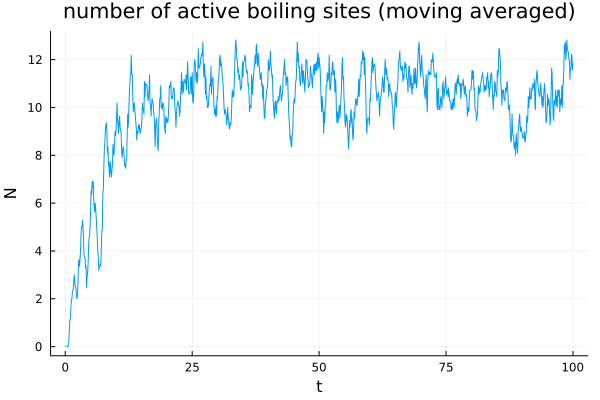

In [36]:
plot(0.1:0.1:100.0,m10.x,xlabel="t",ylabel="N",title="number of active boiling sites (moving averaged)",legend=false)

In [38]:
savefig("boiling frequency.svg")

In [ ]:
boiling

In [43]:
num_boiling = zeros(size(Xstations))
for i = 1:size(boil_data,1)
    num_boiling[Int64(sorted_boil_hist[i,1])] += 1
end
freq_boiling = num_boiling/tend;

LoadError: UndefVarError: sorted_boil_hist not defined

In [44]:
sorted_boil_hist = boil_data[sortperm(boil_data[:, 1]), :]
num_boiling = zeros(size(Xstations))
for i = 1:size(sorted_boil_hist,1)
    num_boiling[Int64(sorted_boil_hist[i,1])] += 1
end
freq_boiling = num_boiling/tend;

In [45]:
scatter(xstations,freq_boiling,xlabel="x[m]",ylabel="boiling frequency [HZ]",legend=false)

LoadError: UndefVarError: xstations not defined

In [46]:
scatter(ystations,freq_boiling,xlabel="y[m]",ylabel="boiling frequency [HZ]",legend=false)

LoadError: UndefVarError: ystations not defined

In [47]:
ohp = load("ohp.jld2","ohp")

Basic pointwise-specified body with 4877 points
   Current position: (0.0,0.0)
   Current angle (rad): 0.0


In [59]:
Lx = 0.1524; # plate size x
Ly = 0.0648; # plate size y

xlim = (-Lx/2,Lx/2) .*1.0
ylim = (-Ly/2,Ly/2) .*1.0
# Δx, Δt = setstepsizes(params.α,gridPe=8.0,fourier=0.3)


(-0.0324, 0.0324)

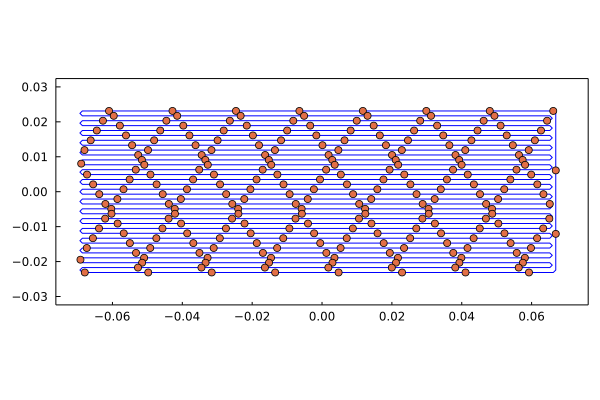

In [64]:
plot(ohp,fillalpha=0,linecolor=:blue,xlims=xlim,ylims=ylim,framestyle = :box)
scatter!(xstations,ystations)

In [65]:
savefig("boiling sites.svg")

In [55]:
ql = sys.qline[1]
interp_linear_x = LinearInterpolation(ql.arccoord, ql.body.x,extrapolation_bc = Line());
interp_linear_y = LinearInterpolation(ql.arccoord, ql.body.y,extrapolation_bc = Line());

xstations = interp_linear_x[sysfinal[end].wall.Xstations]
ystations = interp_linear_y[sysfinal[end].wall.Xstations]

256-element Vector{Float64}:
  0.023125
  0.023125000000000003
  0.023125000000000003
  0.023125000000000007
  0.02312500000000001
  0.02312500000000001
  0.023125000000000014
  0.023125000000000017
  0.021723484848484863
  0.02172348484848486
  0.021723484848484853
  0.021723484848484853
  0.021723484848484846
  ⋮
 -0.02172348484848511
 -0.02172348484848511
 -0.023125000000000256
 -0.023125000000000263
 -0.023125000000000263
 -0.02312500000000027
 -0.023125000000000277
 -0.023125000000000284
 -0.023125000000000284
 -0.02312500000000029
 -0.012067031252159
  0.006099649407358557

In [53]:
Lliquid = XptoLliquidslug(sysfinal[end].liquid.Xp,sysfinal[end].tube.L)

sum(Lliquid)/sysfinal[end].tube.L

0.4692492358601542

In [ ]:
Causius-Clayperon equation